#### Stationarity in Time Series Analysis

### Feb. 2024 created by Yan Ge, Yang Yang

In this Notebook, we will practice on:1) Stationarity Check; 2) ADF test; 3)Time-series data transformation to stationarity

Part of this tutorial referenced following source:


### Knowledge Check

Review the lecture notes about following concept:

1. What is stochastic process?
2. What is stationary time series?
3. The standards of stationary time series are? 
4. What is unit root?
5. What is the null hypothesis of ADF test?







### Stationarity

Use the knowledge you learnt from the lecture, check the stationarity of the data by visual inspection.


In [ ]:
# Load data from 'stationary.csv' and visually identify the stationarity of each data

In [7]:
# Load the data and inspect the data head().

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('stationary.csv',parse_dates=['Date'], index_col=['Date'], dayfirst=True)

df.head()


,p1,p2,p3,p4,p5
Date,,,,,
1/1/2023,3.483571,12.483571,-2.830000,0.357787,-0.830000
1/2/2023,1.308678,9.625798,1.165198,0.918572,-0.560000
1/3/2023,6.238443,13.871405,3.245937,2.001623,0.747294
1/4/2023,11.615149,18.561405,4.091787,3.055425,0.610370
1/5/2023,3.830000,10.084973,6.907054,1.677756,-0.020000


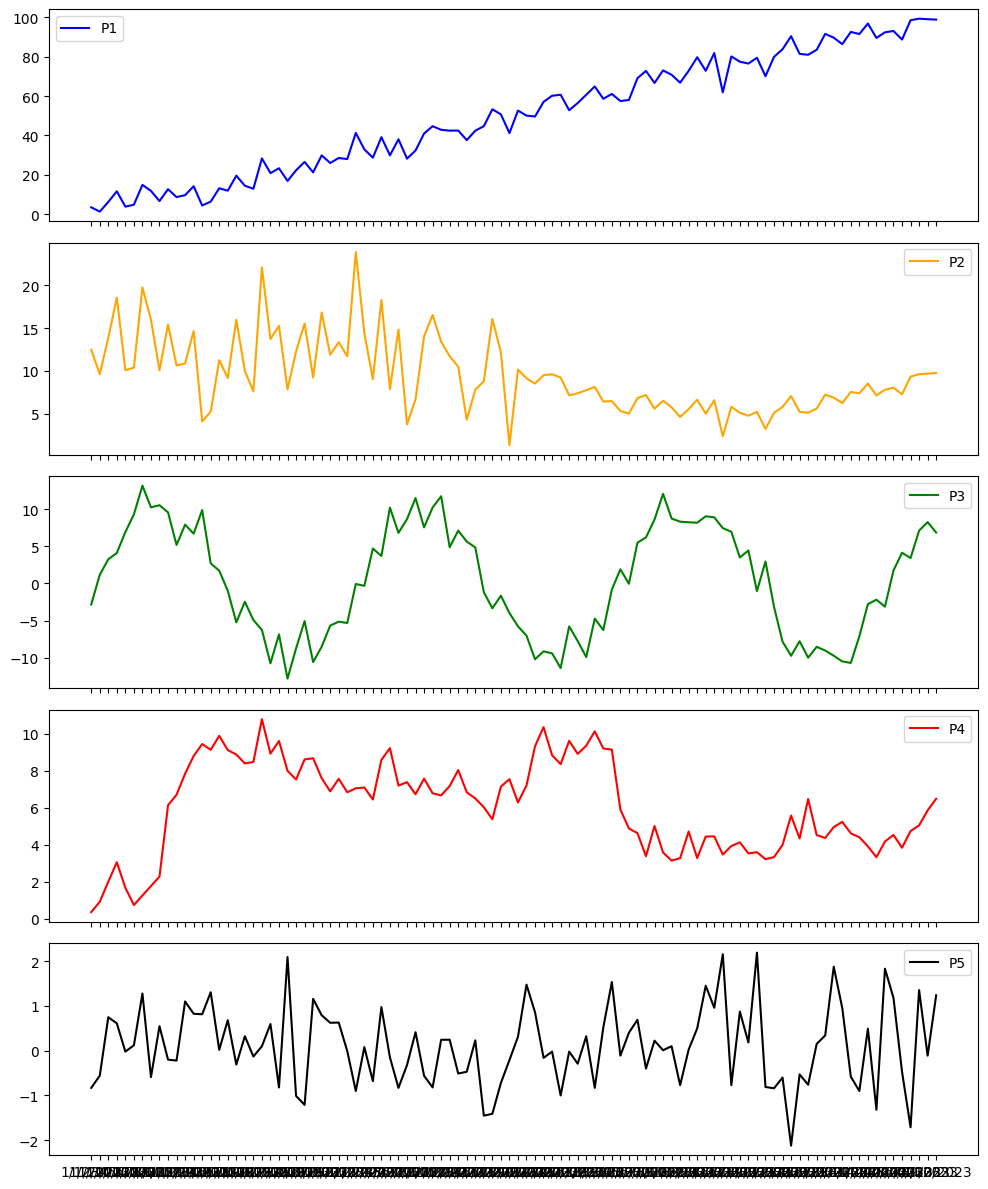

In [8]:
# Visually inspect the time series in the datafram by plot the line graph

import matplotlib.pyplot as plt

# Plotting the four time series in separate subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# 1st column
axs[0].plot(df.index, df['p1'], label='P1', color='blue')
axs[0].legend()

#  2nd column
axs[1].plot(df.index, df['p2'], label='P2', color='orange')
axs[1].legend()

#  3rd column
axs[2].plot(df.index, df['p3'], label='P3', color='green')
axs[2].legend()

# 4th column
axs[3].plot(df.index, df['p4'], label='P4', color='red')
axs[3].legend()

# 5th column
axs[4].plot(df.index, df['p5'], label='P5', color='black')
axs[4].legend()

plt.tight_layout()  # Adjust the layout to make room for the titles and labels
plt.show()  # Display the plots


### ADF test

Use ADF test to test the stationarity of the time series and validate the results you draw from visual inspection


In [14]:
# Use the adfuller() function from statsmodels package, do ADF test on the data.  

# The following function is defined to interpret the adfuller() results, you can choose to not use it.

from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print('Reject H0. Data has no unit root')
    else:
        print("Can not reject H0, time series has a unit root, indicating it is non-stationary \n")




In [19]:
adf_check(df['p2'])

# What can you tell from the results? Especially the third column?

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.397957703478997
p-value : 0.5832548285551429
Number of Lags Used : 10
Number of Observations Used : 89
Can not reject H0, time series has a unit root, indicating it is non-stationary 



In [39]:
# ADF tests can only test the unit root. p3 has seasonality, which means non-stationary, but passed the ADF tests (reject H0) 

### Unit root
Let's have a look at the unit root.

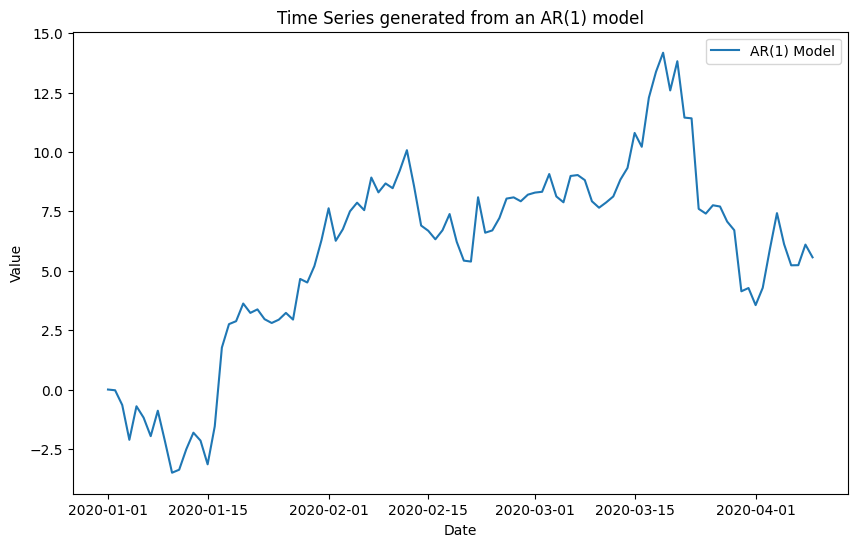

,AR(1)
2020-01-01,0.000000
2020-01-02,-0.030978
2020-01-03,-0.651906
2020-01-04,-2.116487
2020-01-05,-0.704540


In [31]:
# Use the AR(1) model to generate a time series and plot it out , try different conditions of phi  (<1,=1, >1)to see the results.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the AR(1) model
phi = 1  # Autoregressive coefficient
sigma = 1  # Standard deviation of the white noise
n = 100  # Number of observations

# Seed for reproducibility
np.random.seed(50)

# Generate white noise
epsilon = np.random.normal(loc=0, scale=sigma, size=n)

# Initialize the time series array
Y = np.zeros(n)

# Generate the AR(1) series
for t in range(1, n):
    Y[t] = phi * Y[t-1] + epsilon[t]

# Convert to pandas DataFrame for easy plotting and handling
dates = pd.date_range(start='2020-01-01', periods=n)
time_series = pd.DataFrame(Y, index=dates, columns=['AR(1)'])

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='AR(1) Model')
plt.title('Time Series generated from an AR(1) model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

time_series.head()


In [27]:
# Use the ADF test on the time series
adf_check(time_series)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.6865716497206364
p-value : 0.4380441087061204
Number of Lags Used : 0
Number of Observations Used : 99
Can not reject H0, time series has a unit root, indicating it is non-stationary 



### Time-series data transformation to stationarity

We can try to use differencing for non-stationary to stationary transfer

In [32]:
# Use the AR(1) time series  in last section, generate an AR(1) time series with Unit Root.
# Use differencing technique .diff()  to generate a differencing column

import pandas as pd
import matplotlib.pylab as plot
from datetime import datetime

# Take first difference
time_series['diff'] = time_series.diff()

# Remove the first data point
time_series.dropna(inplace=True)

# # Take a look at the head of the dataset
time_series.head()


,AR(1),diff
2020-01-02,-0.030978,-0.030978
2020-01-03,-0.651906,-0.620928
2020-01-04,-2.116487,-1.464580
2020-01-05,-0.704540,1.411946
2020-01-06,-1.181273,-0.476732


Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.7027067588655
p-value : 1.0616973382577686e-16
Number of Lags Used : 0
Number of Observations Used : 98
Reject H0. Data has no unit root


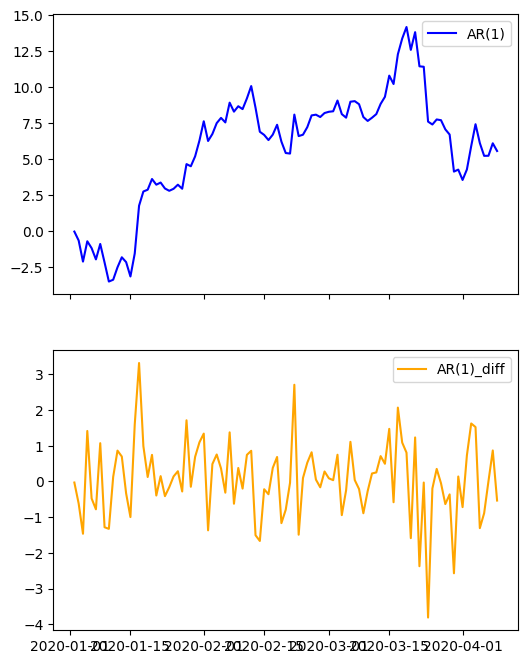

In [34]:
# Plot the differencing data and do ADF test

fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# 1st column
axs[0].plot(time_series.index, time_series['AR(1)'], label='AR(1)', color='blue')
axs[0].legend()

#  2nd column
axs[1].plot(time_series.index, time_series['diff'], label='AR(1)_diff', color='orange')
axs[1].legend()

adf_check(time_series['diff'])

In [35]:
# Load the AAPL.csv, and try the test on apple stock price data

df_AAPL = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)
df_AAPL.head()

C:\Users\rf23386\AppData\Local\Temp\ipykernel_13756\3868248027.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_AAPL = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)


,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-30,135.186666,135.990005,133.399994,133.720001
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004


In [37]:
# Take first difference
df_AAPL['Close_diff'] = df_AAPL['Close'].diff()

# Remove the first data point
df_AAPL.dropna(inplace=True)

# # Take a look at the head of the dataset
df_AAPL.head()

,Open,High,Low,Close,Close_diff
Date,,,,,
2020-12-29,138.050003,138.789993,134.339996,134.869995,-1.820007
2020-12-30,135.186666,135.990005,133.399994,133.720001,-1.149994
2020-12-31,134.080002,134.740005,131.720001,132.690002,-1.029999
2021-01-04,133.520004,133.610001,126.760002,129.410004,-3.279998
2021-01-05,128.889999,131.740005,128.429993,131.009995,1.599991


Augmented Dickey-Fuller Test:
ADF Test Statistic : -15.990118981622722
p-value : 6.685719560787897e-29
Number of Lags Used : 0
Number of Observations Used : 250
Reject H0. Data has no unit root


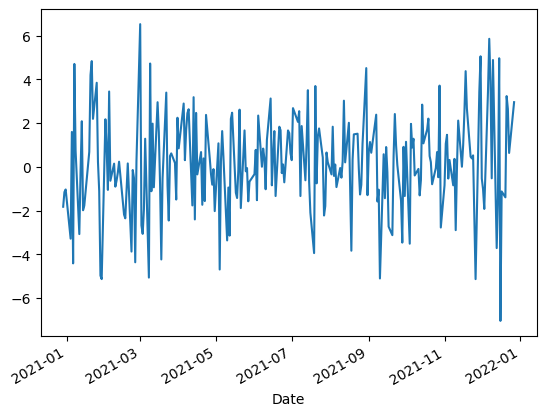

In [38]:
df_AAPL['Close_diff'].plot()
adf_check(df_AAPL['Close_diff'])